In [ ]:
# TRAITEMENT DES DONNEES MANQUANTES 
# Nous remplaçons les données manquantes des colonnes catégorielles par les valeurs qui 
# qui ont la plus grande fréquence(qui se repètent le plus dans la colonne)

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/dataset_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [93]:
# Affichage de toutes les lignes du dataFrame
# pd.set_option('display.max_rows',df.shape[0]+1)

In [94]:
# Retour à l'affichage des dix lignes 
# pd.set_option('display.max_rows',10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP001015,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [98]:
# DESCRIPTION DES COLONNES

In [7]:
# Gender : Le genre du demandeur
df['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [8]:
# Married : Le statut marital du demandeur
df['Married'].value_counts()

Married
Yes    233
No     134
Name: count, dtype: int64

In [9]:
# Dependents : Personnes à charge du demandeur
df['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [10]:
# Education : Niveau d'étude du demandeur
df['Education'].value_counts()

Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [12]:
df['Property_Area'].value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

In [13]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [14]:
df['Credit_History'].value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

In [15]:
# Suppression de la colonne Loan_ID
df = df.drop('Loan_ID',axis=1)

In [16]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [17]:
(100* df.isnull().sum() / len(df)).sort_values(ascending=False)

Credit_History       7.901907
Self_Employed        6.267030
Gender               2.997275
Dependents           2.724796
Loan_Amount_Term     1.634877
LoanAmount           1.362398
Married              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
dtype: float64

In [18]:
# Fonction pour calculer le pourcentage des données manquantes(NaN)
def pourcentage_nan(df):
    pourcent_nan_data = 100* df.isnull().sum() / len(df)
    pourcent_nan_data = pourcent_nan_data[pourcent_nan_data>0].sort_values()
    return pourcent_nan_data

In [19]:
# Application de la fonction sur le dataframe
data_missing_percent = pourcentage_nan(df)

In [20]:
data_missing_percent

LoanAmount          1.362398
Loan_Amount_Term    1.634877
Dependents          2.724796
Gender              2.997275
Self_Employed       6.267030
Credit_History      7.901907
dtype: float64

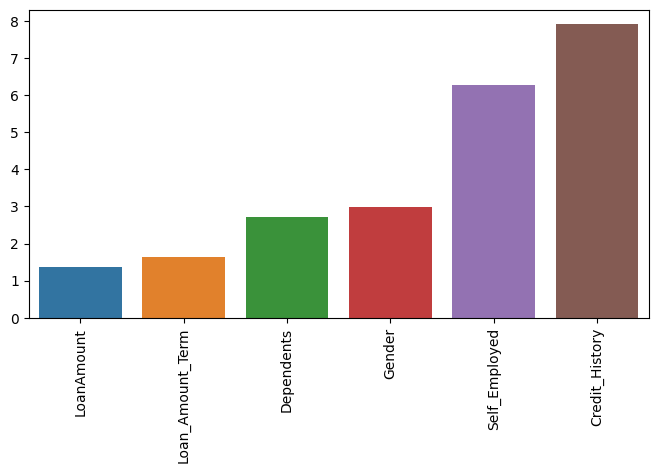

In [21]:
# VISUALISATION DES POURCENTAGES DES DONNEES MANQUANTES PAR FEATURES
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=data_missing_percent.index,y=data_missing_percent)
plt.xticks(rotation=90);

In [ ]:
# Renseignement des données manquantes des colonnes catégorielles

In [22]:
# La colonne : Gender 
df['Gender'] = df['Gender'].fillna('Male')

In [23]:
# La colonne : Dependents
df['Dependents'] = df['Dependents'].fillna('0')

In [24]:
# La colonne : Self_Employed
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [ ]:
# Renseignement des données manquantes des colonnes numériques

In [25]:
# La colonne : Loan_Amount_Term
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [26]:
# La colonne : Loan_Amount
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [27]:
# La colonne : Loan_Amount
df['Credit_History'] = df['Credit_History'].fillna(0.0)

In [28]:
# Application de la fonction sur le dataframe
data_missing_percent = pourcentage_nan(df)

In [29]:
# Pas de valeurs manquantes
data_missing_percent

Series([], dtype: float64)

In [30]:
df.to_csv("dataset_test_No_NaN.csv",index=False)